In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,  PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier, StackingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('Final_2_cleaned.csv')
df.head(5)

,Rank,Ticker,Company Name,Industry,Sector,Country,Profit (Billion $),Revenue (Billion $),Assets (Billion $),Market Value (Billion $),...,Current Price,52 Week High,52 Week Low,CEO,Gender,EBITDA,Rating,Beta,No of Employees,Founding Year
0,1.0,JPM,JPMorganChase,Banks - Diversified,Financial Services,United States,50.0,252.9,4090.7,588.1,...,267.30,270.82,172.62,James Dimon,Male,74.63,3.0,1.09,317233,1980
1,2.0,BRK-B,Berkshire Hathaway,Insurance - Diversified,Financial Services,United States,73.4,369.0,1070.0,899.1,...,468.67,491.67,389.29,Warren E. Buffett,Male,0.00,3.0,0.86,392400,1996
2,3.0,2222.SR,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Integrated,Energy,Saudi Arabia,116.9,489.1,661.5,1919.3,...,27.65,32.65,26.80,Amin H. Nasser,Male,996.71,3.0,0.17,67947,2019
3,4.0,1398.HK,ICBC,Banks - Diversified,Financial Services,China,50.4,223.8,6586.0,215.2,...,5.28,5.36,3.75,Chen Siqing,Male,12.18,3.0,0.97,72000,1980
4,5.0,BAC,Bank of America,Banks - Diversified,Financial Services,United States,25.0,183.3,3273.8,307.3,...,46.30,48.08,32.35,Brian T. Moynihan,Male,29.25,1.0,1.33,213000,1973


In [81]:
numeric_cols = ['Profit (Billion $)', 'Revenue (Billion $)', 'Assets (Billion $)', 'EBITDA', 'Market Cap(Billion $)']
target = 'Rating'

In [ ]:
# Converting ratings to 0-based 
df[target] = pd.to_numeric(df[target], errors='coerce').fillna(3).astype(int)
df[target] = df[target] - 1  # Convert 1-4 ratings to 0-3
df = df[numeric_cols + [target]].dropna()

In [ ]:
# Feature Engineering
df['Profit_Margin'] = df['Profit (Billion $)'] / df['Revenue (Billion $)']
df['ROA'] = df['Profit (Billion $)'] / df['Assets (Billion $)']
df['EBITDA_Margin'] = df['EBITDA'] / df['Revenue (Billion $)']
df['MarketCap_to_Assets'] = df['Market Cap(Billion $)'] / df['Assets (Billion $)']

df.head(10)

,Profit (Billion $),Revenue (Billion $),Assets (Billion $),EBITDA,Market Cap(Billion $),Rating,Profit_Margin,ROA,EBITDA_Margin,MarketCap_to_Assets
0,50.0,252.9,4090.7,74.63,747.80,2,0.197707,0.012223,0.295097,0.182805
1,73.4,369.0,1070.0,0.00,1010.43,2,0.198916,0.068598,0.000000,0.944327
2,116.9,489.1,661.5,996.71,6698.99,2,0.239010,0.176720,2.037845,10.126969
3,50.4,223.8,6586.0,12.18,2449.09,2,0.225201,0.007653,0.054424,0.371863
4,25.0,183.3,3273.8,29.25,352.38,0,0.136388,0.007636,0.159574,0.107636
5,37.7,590.7,531.0,123.82,2499.21,2,0.063823,0.070998,0.209616,4.706610
6,47.0,199.8,5403.8,12.18,1487.10,2,0.235235,0.008698,0.060961,0.275195
7,86.2,236.6,484.3,133.01,3085.55,2,0.364328,0.177989,0.562172,6.371154
8,37.4,193.5,5832.9,12.18,1768.58,2,0.193282,0.006412,0.062946,0.303208
9,82.4,317.9,407.4,112.39,2506.16,3,0.259201,0.202258,0.353539,6.151595


In [ ]:
for col in ['Profit_Margin', 'ROA', 'EBITDA_Margin', 'MarketCap_to_Assets']:
    df[col] = df[col].replace([np.inf, -np.inf], np.nan).fillna(0)

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
poly_features = poly.fit_transform(df[numeric_cols])
poly_feature_names = poly.get_feature_names_out(numeric_cols)
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names, index=df.index)
df = pd.concat([df, df_poly], axis=1)


In [ ]:
# 3. Train-test split
feature_cols = list(df.columns)
feature_cols.remove(target)
X = df[feature_cols]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

In [ ]:
print("Training Data Sample (Features):")
print(X_train.head())

Training Data Sample (Features):
     Profit (Billion $)  Profit (Billion $)  Revenue (Billion $)  \
110                10.1                10.1                 54.0   
158                 2.4                 2.4                 24.1   
171               807.0               807.0                 13.1   
168               -10.8               -10.8                 14.1   
114                 7.3                 7.3                 55.3   

     Revenue (Billion $)  Assets (Billion $)  Assets (Billion $)  EBITDA  \
110                 54.0               103.5               103.5   23.16   
158                 24.1               127.6               127.6    9.55   
171                 13.1                24.8                24.8    2.63   
168                 14.1                33.2                33.2    4.10   
114                 55.3               100.0               100.0   23.52   

     EBITDA  Market Cap(Billion $)  Market Cap(Billion $)  ...  \
110   23.16                  98.32 

In [61]:
print("\nTraining Data Sample (Target):")
print(y_train.head())


Training Data Sample (Target):
110    1
158    1
171    1
168    1
114    3
Name: Rating, dtype: int64


In [ ]:
print("\nTesting Data Sample (Features):")
print(X_test.head())


Testing Data Sample (Features):
     Profit (Billion $)  Profit (Billion $)  Revenue (Billion $)  \
173                 1.4                 1.4                 16.8   
17                 22.7                22.7                399.1   
147                 4.4                 4.4                 48.0   
8                  37.4                37.4                193.5   
169                 1.4                 1.4                 14.3   

     Revenue (Billion $)  Assets (Billion $)  Assets (Billion $)  EBITDA  \
173                 16.8               353.9               353.9    0.00   
17                 399.1               388.1               388.1   12.18   
147                 48.0               212.3               212.3   12.18   
8                  193.5              5832.9              5832.9   12.18   
169                 14.3                 9.8                 9.8    2.23   

     EBITDA  Market Cap(Billion $)  Market Cap(Billion $)  ...  \
173    0.00                   6.59 

In [63]:
print("\nTesting Data Sample (Target):")
print(y_test.head())


Testing Data Sample (Target):
173    3
17     2
147    2
8      2
169    1
Name: Rating, dtype: int64


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  
    n_estimators=200,
    learning_rate=0.1,
    random_state=42
)
ada.fit(X_train_scaled, y_train)
bag = BaggingClassifier(DecisionTreeClassifier(class_weight='balanced'), n_estimators=100, random_state=42)
hist_gbdt = HistGradientBoostingClassifier(max_iter=200, random_state=42)

voting = VotingClassifier(estimators=[
    ('rf', rf), ('ada', ada), ('bag', bag)
], voting='soft')
stacking = StackingClassifier(estimators=[
    ('rf', rf), ('ada', ada), ('bag', bag)
], final_estimator=LogisticRegression(max_iter=1000))

models = {
    'Random Forest': rf,
    'AdaBoost': ada,
    'Bagging': bag,
    'HistGBDT': hist_gbdt,
    'Voting Ensemble': voting,
    'Stacking Ensemble': stacking
}

In [38]:
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'report': classification_report(y_test, y_pred, zero_division=0)
    }

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


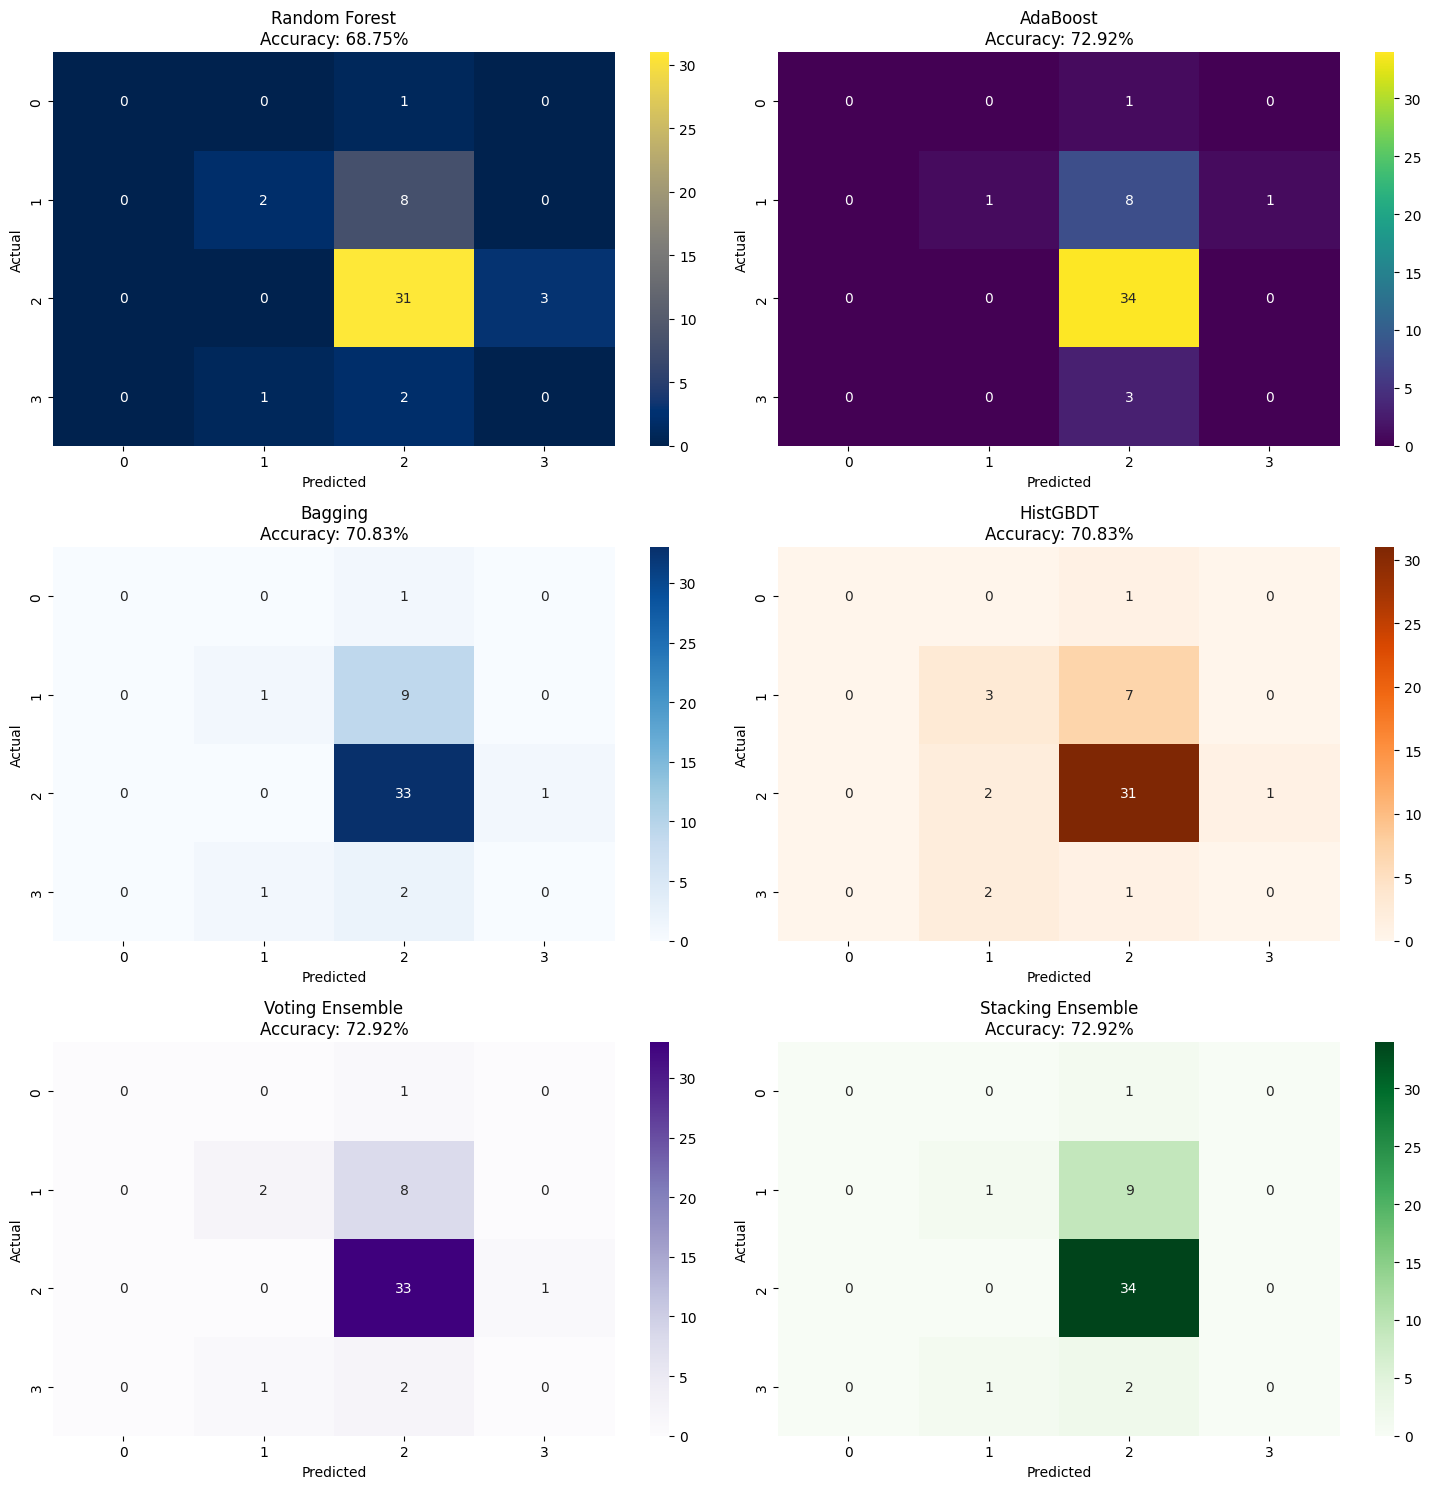

In [ ]:
# Confusion matrices
colormaps = ["cividis", "viridis", "Blues", "Oranges", "Purples", "Greens", "Reds", "YlGnBu", "coolwarm"]
n_models = len(results)
plt.figure(figsize=(15, 15))

for idx, (name, result) in enumerate(results.items()):
    plt.subplot(3, 2, idx+1)
    cmap = colormaps[idx % len(colormaps)]  # Cycle through colormaps if more models than colormaps
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap=cmap, 
                xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f'{name}\nAccuracy: {result["accuracy"]:.2%}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()


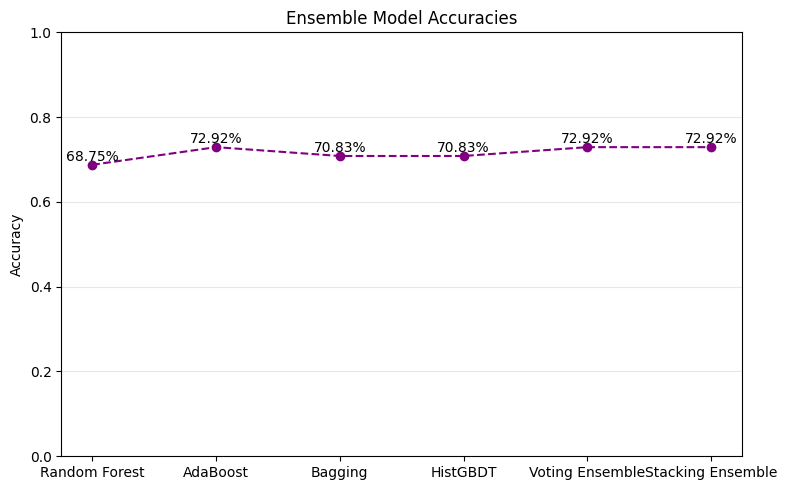

In [ ]:
# Accuracy line plot
plt.figure(figsize=(8,5))
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]
plt.plot(model_names, accuracies, marker='o', linestyle='--', color='purple')
for i, acc in enumerate(accuracies):
    plt.text(i, acc+0.01, f"{acc:.2%}", ha='center')
plt.title('Ensemble Model Accuracies')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
#classification reports
for name, result in results.items():
    print(f"\n{name}:\n{result['report']}")


Random Forest:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.20      0.31        10
           2       0.74      0.91      0.82        34
           3       0.00      0.00      0.00         3

    accuracy                           0.69        48
   macro avg       0.35      0.28      0.28        48
weighted avg       0.66      0.69      0.64        48


AdaBoost:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.10      0.18        10
           2       0.74      1.00      0.85        34
           3       0.00      0.00      0.00         3

    accuracy                           0.73        48
   macro avg       0.43      0.28      0.26        48
weighted avg       0.73      0.73      0.64        48


Bagging:
              precision    recall  f1-score   support

           0       0.00      0.00     

In [ ]:
# Comparing feature importances
for model in models:
    if hasattr(model, 'feature_importances_'):
        print(f"{model.__class__.__name__} Top Features:")
        print(pd.Series(model.feature_importances_, index=X.columns)
              .sort_values(ascending=False).head(3))


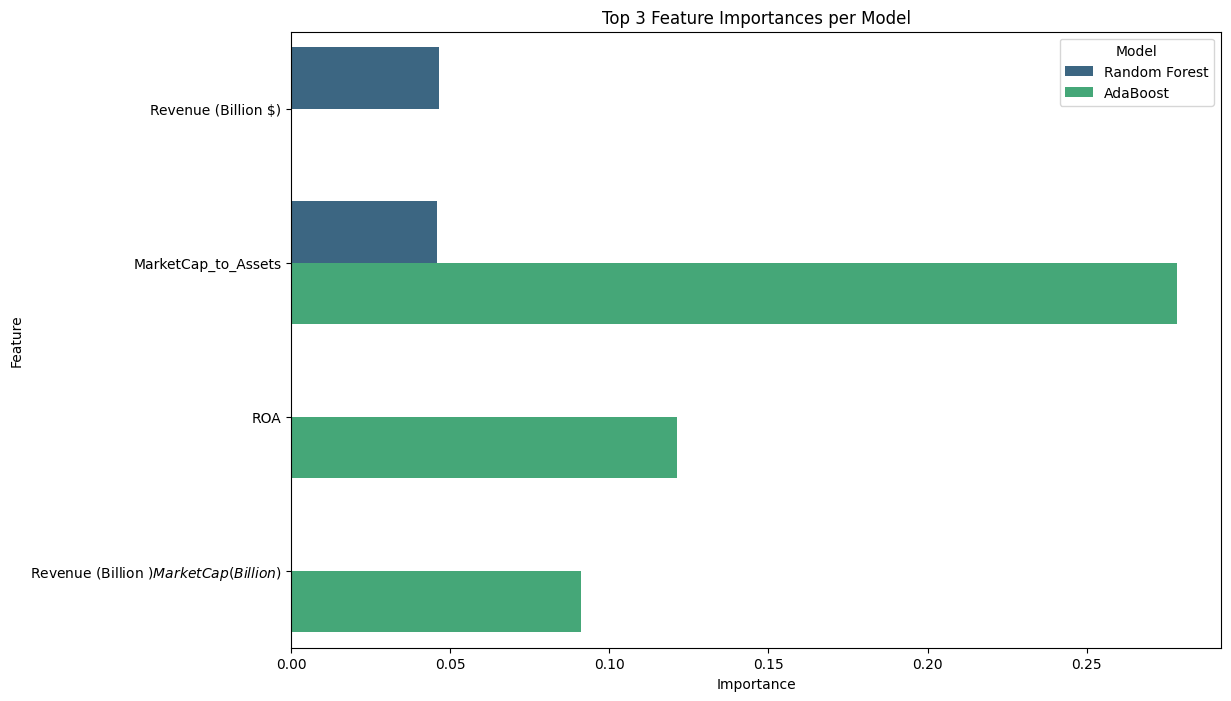

In [ ]:

top_features = {}
for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        importances = pd.Series(model.feature_importances_, index=X.columns)
        top3 = importances.sort_values(ascending=False).head(3)
        top_features[name] = dict(zip(top3.index, top3.values))


top_features_df = (
    pd.DataFrame(top_features)
    .stack()  
    .reset_index()
    .rename(columns={'level_0': 'Feature', 'level_1': 'Model', 0: 'Importance'})
)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_features_df,
    x='Importance',
    y='Feature',
    hue='Model',
    palette='viridis'
)
plt.title('Top 3 Feature Importances per Model')
plt.show()

In [ ]:
report_dict = {}
for name in ['AdaBoost', 'Voting Ensemble', 'Stacking Ensemble']:
    y_pred = models[name].predict(X_test_scaled)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    # Get macro avg for overall, and per-class metrics
    row = {
        'precision_0': report['0']['precision'],
        'recall_0': report['0']['recall'],
        'f1_0': report['0']['f1-score'],
        'precision_1': report['1']['precision'],
        'recall_1': report['1']['recall'],
        'f1_1': report['1']['f1-score'],
        'precision_2': report['2']['precision'],
        'recall_2': report['2']['recall'],
        'f1_2': report['2']['f1-score'],
        'precision_3': report['3']['precision'],
        'recall_3': report['3']['recall'],
        'f1_3': report['3']['f1-score'],
        'macro_precision': report['macro avg']['precision'],
        'macro_recall': report['macro avg']['recall'],
        'macro_f1': report['macro avg']['f1-score'],
        'accuracy': report['accuracy']
    }
    report_dict[name] = row

# Create DataFrame for display
metrics_df = pd.DataFrame(report_dict).T[
    ['precision_1','recall_1','f1_1',
     'precision_2','recall_2','f1_2',
     'precision_3','recall_3','f1_3',]
]
print(metrics_df.round(3))


                   precision_1  recall_1   f1_1  precision_2  recall_2   f1_2  \
AdaBoost                 1.000       0.1  0.182        0.739     1.000  0.850   
Voting Ensemble          0.667       0.2  0.308        0.750     0.971  0.846   
Stacking Ensemble        0.500       0.1  0.167        0.739     1.000  0.850   

                   precision_3  recall_3  f1_3  
AdaBoost                   0.0       0.0   0.0  
Voting Ensemble            0.0       0.0   0.0  
Stacking Ensemble          0.0       0.0   0.0  
